# Abstract 
Email is a widely-used, efficient, and secure communication tool. However, with the growth of social networks and online platforms, inboxes are increasingly flooded with unsolicited or spam messages. This project aims to build a spam classification model using Python text classification techniques to effectively identify and categorize emails as "spam" or "non-spam." Various machine learning algorithms, including Naive Bayes and decision tree-based models, will be applied and evaluated to determine the most accurate method for this classification task.

# Libraries

In [5]:
# Data manipulation
import pandas as pd
import numpy as np


# Machine learning algorithms and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Importing Data

In [8]:
df = pd.read_csv("emails.csv")


# Exploring

In [9]:
df.info

<bound method DataFrame.info of                                                    text  spam
0     Subject: naturally irresistible your corporate...     1
1     Subject: the stock trading gunslinger  fanny i...     1
2     Subject: unbelievable new homes made easy  im ...     1
3     Subject: 4 color printing special  request add...     1
4     Subject: do not have money , get software cds ...     1
...                                                 ...   ...
5723  Subject: re : research and development charges...     0
5724  Subject: re : receipts from visit  jim ,  than...     0
5725  Subject: re : enron case study update  wow ! a...     0
5726  Subject: re : interest  david ,  please , call...     0
5727  Subject: news : aurora 5 . 2 update  aurora ve...     0

[5728 rows x 2 columns]>

In [10]:
# Check for any missing values in the entire dataset
print(df.isnull().sum())


text    0
spam    0
dtype: int64


There is no missing data, we are good to go.

0    4360
1    1368
Name: spam, dtype: int64


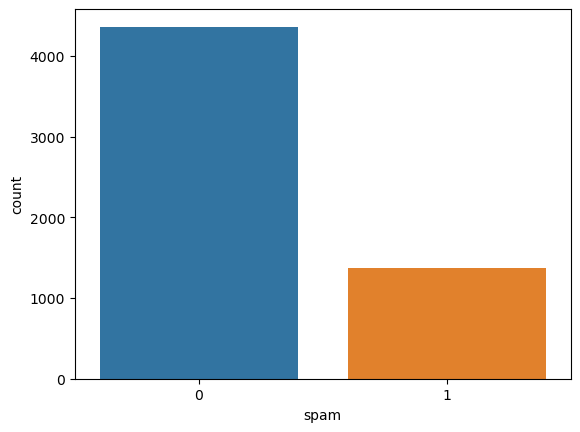

In [7]:
print(df['spam'].value_counts())
sns.countplot(x='spam', data=df)
plt.show()

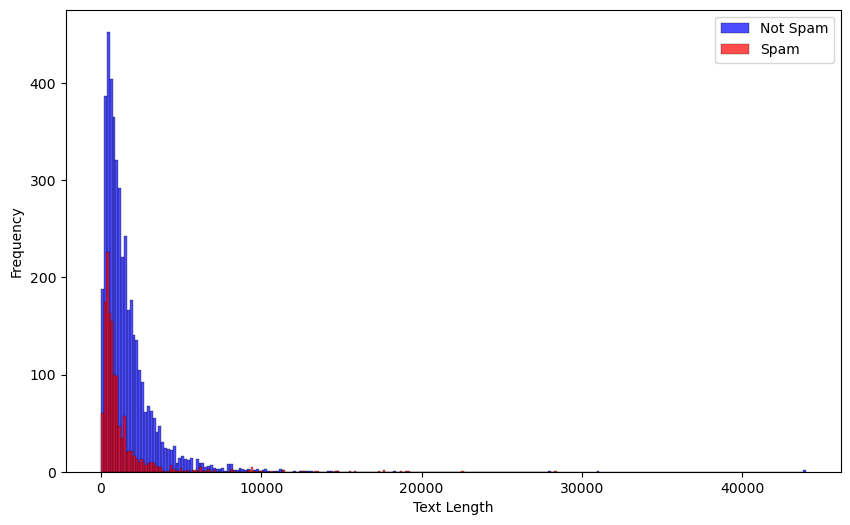

In [11]:
# Create column text length
df['text_length'] = df['text'].str.len()

# Graph
plt.figure(figsize=(10, 6))
sns.histplot(df[df['spam'] == 0]['text_length'], color='blue', label='Not Spam', alpha=0.7)
sns.histplot(df[df['spam'] == 1]['text_length'], color='red', label='Spam', alpha=0.7)
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Vecctorize Text

In [13]:

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
Y = df['spam']

# Splitting

In [17]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=108)

# Print the shapes of the split data
print("Training data shape:", train_X.shape, train_Y.shape)
print("Testing data shape:", test_X.shape, test_Y.shape)

Training data shape: (4009, 36996) (4009,)
Testing data shape: (1719, 36996) (1719,)


# Model

In [18]:
model = MultinomialNB()
model.fit(train_X, train_Y)

MultinomialNB()

# Report

In [19]:
y_pred = model.predict(test_X)

In [23]:
conf_matrix = confusion_matrix(test_Y, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy_score(test_Y, y_pred)}")
print(classification_report(test_Y, y_pred))

Confusion Matrix:
[[1282   17]
 [   2  418]]
Accuracy: 0.9889470622454916
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1299
           1       0.96      1.00      0.98       420

    accuracy                           0.99      1719
   macro avg       0.98      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



True Positives (TP): 418 spam emails correctly identified.

True Negatives (TN): 1282 non-spam emails correctly identified.

False Positives (FP): 17 non-spam emails misclassified as spam.

False Negatives (FN): 2 spam emails misclassified as non-spam.

Accuracy: 0.989 (98.89%)
The model correctly identified 98.89% of all emails.